### Load the necessary libraries

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [152]:
df =pd.read_excel("health care diabetes.xlsx")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [153]:
#check the number of rows and columns of the data Sets
df.shape

(768, 9)

In [154]:
#datasets information overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [155]:
#summary Statistics for the datasets
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data preprocessing treating the missing

In [156]:
#check the missing Values 
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### in this datasets 0 represent the null value,and hence we will replace 0 by mean of their feature(variable) columns. 

In [157]:
#indentifying the mean of the features
print(df['Glucose'].mean())
print(df['BloodPressure'].mean())
print(df['SkinThickness'].mean())
print(df['Insulin'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


In [158]:
#find the number of rows which has the null values
print('Glucose',len(df['Glucose'][df['Glucose']==0]))
print('BloodPressure',len(df['BloodPressure'][df['BloodPressure']==0]))
print('SkinThickness',len(df['SkinThickness'][df['SkinThickness']==0]))
print('Insulin',len(df['Insulin'][df['Insulin']==0]))

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374


In [159]:
#find the numm values percentage
selected_columns =['Glucose','BloodPressure','SkinThickness','Insulin']
null_percentage =(df[selected_columns]==0).mean()*100

#Display the null value perccentage for each selected column
print("Percentage Null Value for each columns:")
print(null_percentage)

Percentage Null Value for each columns:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


In [160]:
#ReplaceinG the null values with the mean
df['Glucose']=df['Glucose'].replace([0],[df['Glucose'].mean()])
df['BloodPressure']=df['BloodPressure'].replace([0],[df['BloodPressure'].mean()])
df['SkinThickness']=df['SkinThickness'].replace ([0],[df['SkinThickness'].mean()])  
df['Insulin']=df['Insulin'].replace([0],[df['Insulin'].mean()])

In [161]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [162]:
df['BMI']=df['BMI'].replace([0],[df['BMI'].mean()])

In [163]:
selected_columns =['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [164]:
#CHECKing the nuLL values percentage of the treated columns
selected_columns =['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
null_percentage =(df[selected_columns]==0).mean()*100

#Displaying the null value perccentage for each selected column
print("Percentage Null Value for each columns:")
print(null_percentage)

Percentage Null Value for each columns:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
dtype: float64


In [165]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Inference from Null Value Treatment
### After addressing null values in the datasets ,it is observed that all selected columns {"Glucose",Blood pressure,shinthickness,and Insulin} no longer contain any null values . the null value treatment has been successful ,resulting in a clea datasets with 0% null values in these specific columns  

## Detecing Outlier and Treatment
### Outlier : data points that are significanty different from the rest of the datasets 

In [166]:
columns=df[selected_columns]

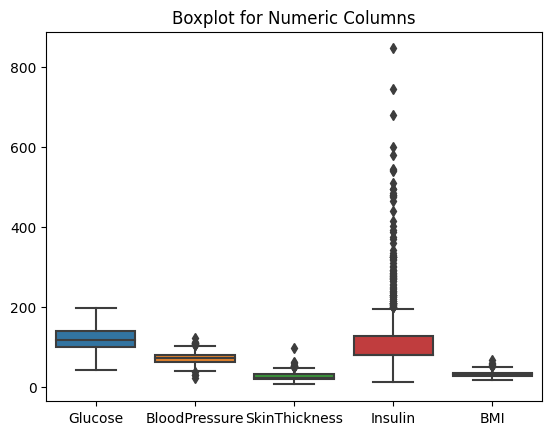

In [167]:
#display boxplot for numeric columns to visualize outlier
plt.Figure(figsize=(12,8))
sns.boxplot(data=columns)
plt.title("Boxplot for Numeric Columns")
plt.show()

In [168]:
#find the outlier count in the sselected columns :
def find_outlier_iqr(df,counm_name):
    #Calculate thre first quartile(Q1) and third quartlie(Q3)
    Q1= df[column_name].quantile(0.25)
    Q3= df[column_name].quantile(0.75)
    
    #Calculaate the intwrquartlie range (IQR)
    IQR =Q3 -Q1
    
    #define the lower and upper bounds for outliers
    LB =Q1 - 1.5 * IQR 
    UB =Q3 + 1.5 * IQR 
    
    #Find outlier
    outliers = df[(df[column_name]< LB) | (df[column_name] > UB ) ]
    
    #Count the number of outlier 
    count_outliers =len(outliers)
    
    return count_outliers

#Calculate and print the number of outliers for each columns of interest
for column_name in selected_columns:
    outlier_count = find_outlier_iqr(df, column_name)
    print(f"Number of outliers in the '{column_name}' column : {outlier_count}") 

Number of outliers in the 'Glucose' column : 0
Number of outliers in the 'BloodPressure' column : 14
Number of outliers in the 'SkinThickness' column : 12
Number of outliers in the 'Insulin' column : 89
Number of outliers in the 'BMI' column : 8


In [169]:
df.describe()
    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Outlier treatment

In [170]:
sorted(df)
Q1 =df.quantile(0.20)
Q3 =df.quantile(0.80)
IQR = Q3-Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.600000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [171]:
data_cleared_iqr =df[~((df<(Q1-1.5*IQR))| (df>(Q3+1.5*IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(df.shape)

(688, 9)
(768, 9)


In [172]:
data_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [173]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

In [174]:
type(col)

pandas.core.frame.DataFrame

In [175]:
col.head()

,Glucose,BloodPressure,SkinThickness,Insulin
0,148.0,72.0,35.000000,79.799479
1,85.0,66.0,29.000000,79.799479
2,183.0,64.0,20.536458,79.799479
3,89.0,66.0,23.000000,94.000000
5,116.0,74.0,20.536458,79.799479


In [176]:
col.shape

(688, 4)

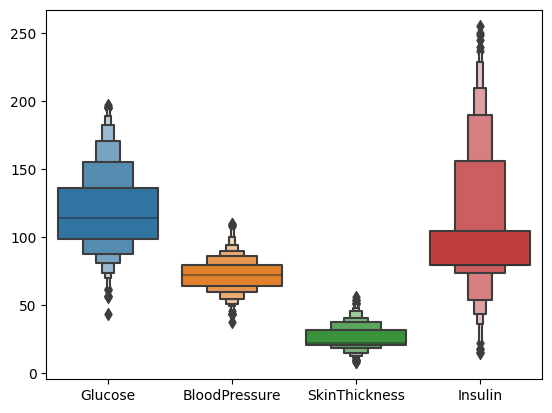

In [177]:
#checkind the outlier after treatment using box plot
plt.Figure(figsize=(12,8))
sns.boxenplot(data=col)
plt.show()

##### it can be observed that the outlier have been significantly reduced

### EDA - Univariate analysis for each feature

### visually exploring variables using histograms

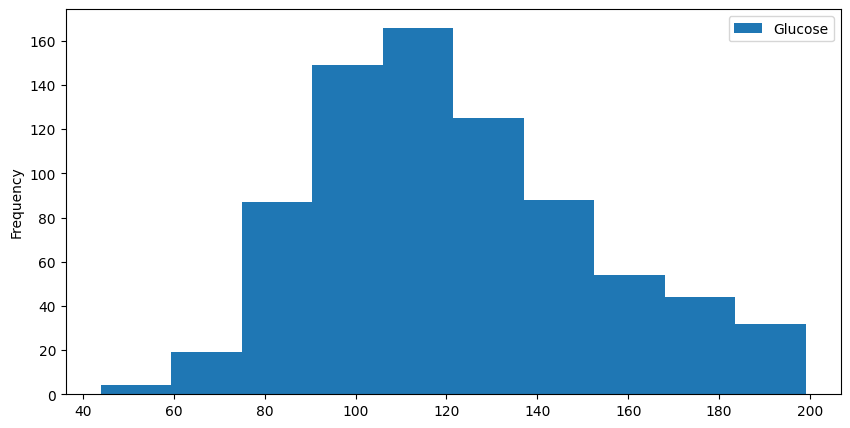

In [178]:
df['Glucose'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

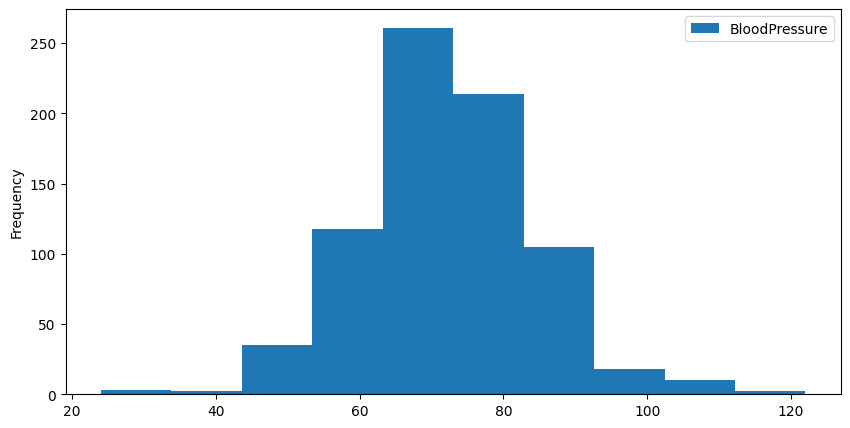

In [179]:
df['BloodPressure'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

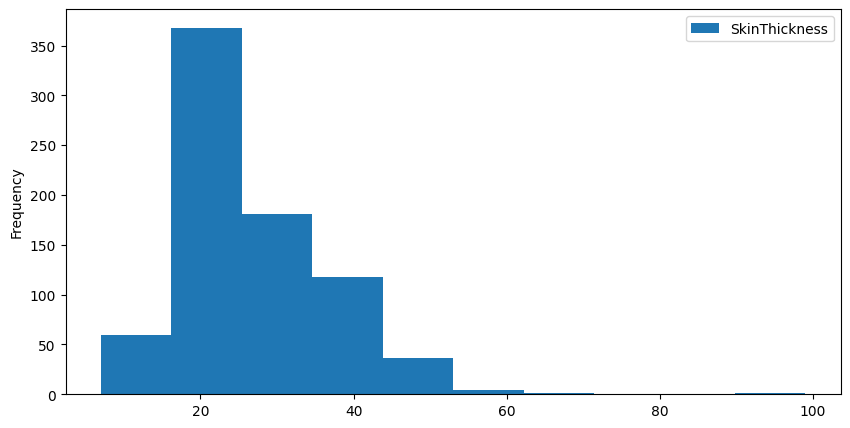

In [180]:
df['SkinThickness'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

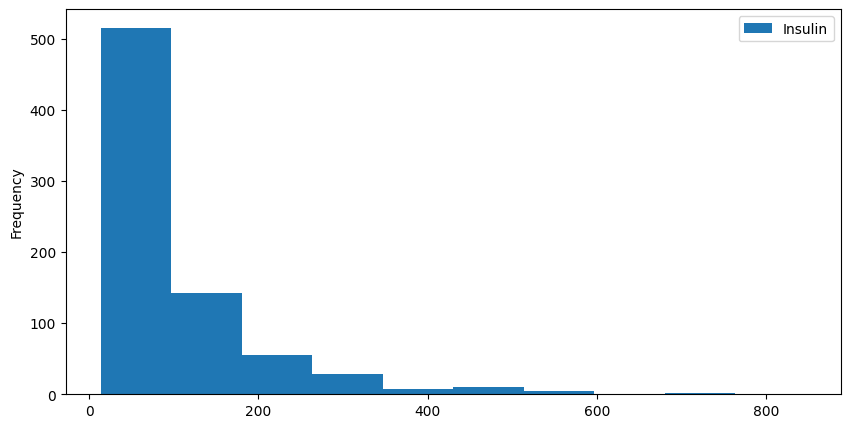

In [181]:
df['Insulin'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

## Violin plot for the selected features

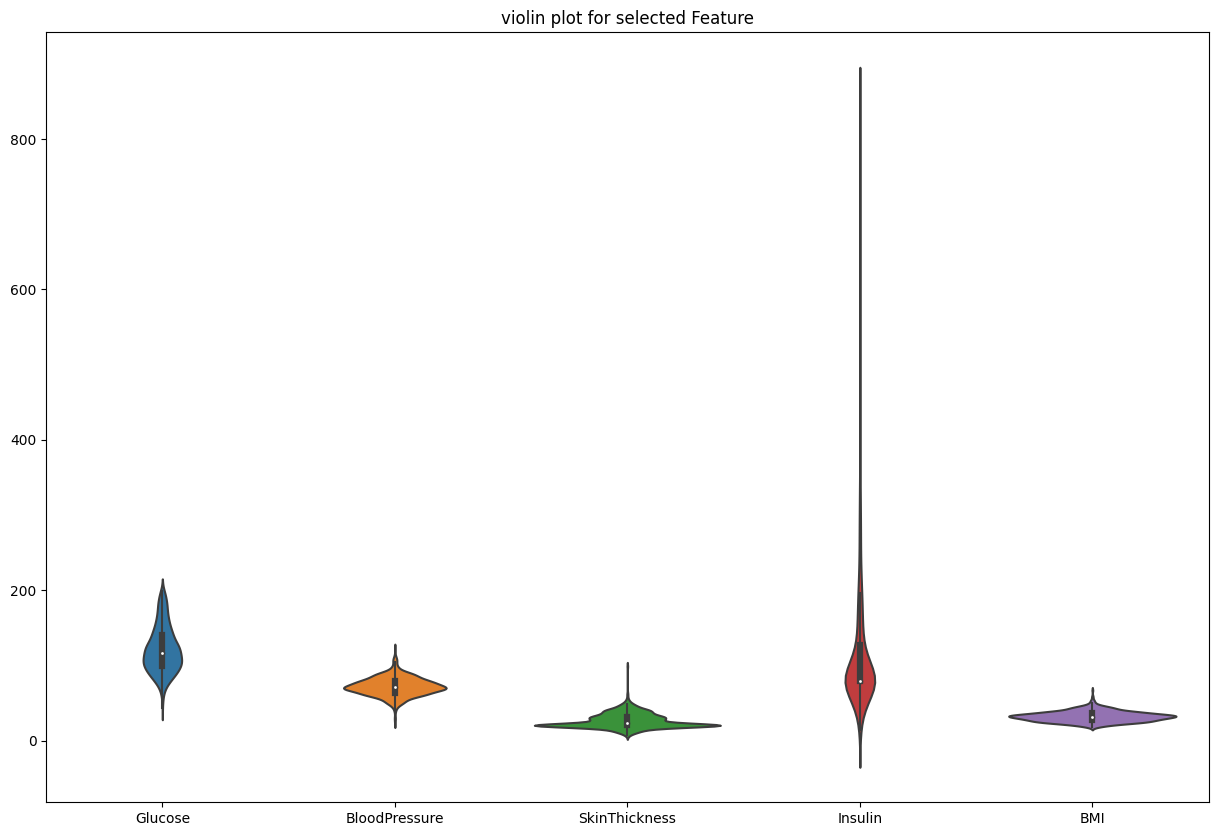

In [182]:
plt.figure(figsize=(15,10))
sns.violinplot(data=df[selected_columns])
plt.title("violin plot for selected Feature")
plt.show()

## Kernel Density Estimation(KDE) plot for the selected features 

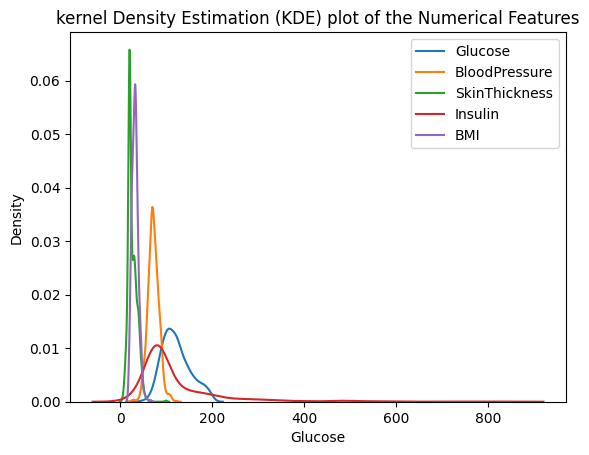

In [183]:
plt.Figure(figsize=(30,10))
for columns in selected_columns:
    sns.kdeplot(df[columns],label=columns)
plt.title("kernel Density Estimation (KDE) plot of the Numerical Features")
plt.legend()
plt.show()    

## creating a count(frequency) plot describing the data types and the count of variables.

In [184]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [185]:
df.dtypes.value_counts()

float64    6
int64      3
Name: count, dtype: int64

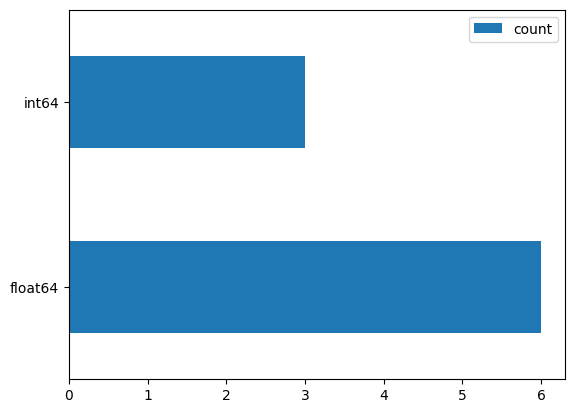

In [186]:
figsize=(16,2)
df.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.show()

## data Exploration

### check the balance of the data by plotting the count of outcomes by thier value.Describe your findings and plan future course of action

In [187]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

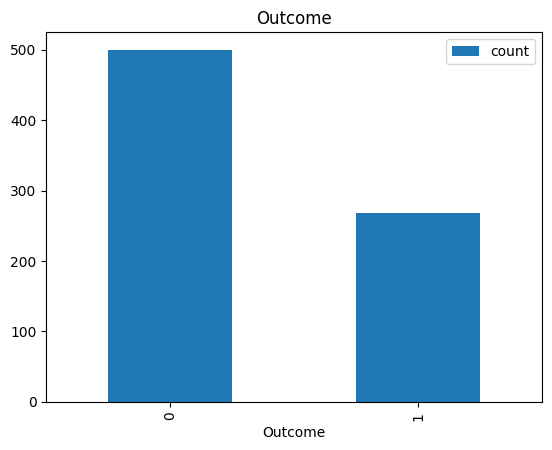

In [188]:
df['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Outcome')
plt.show()

In [189]:
df['Outcome'].value_counts(1)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [190]:
outcome=(df['Outcome'].value_counts()/(df['Outcome'].shape)*100)
outcome

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [191]:
balance_data=100-outcome
balance_data

Outcome
0    34.895833
1    65.104167
Name: count, dtype: float64

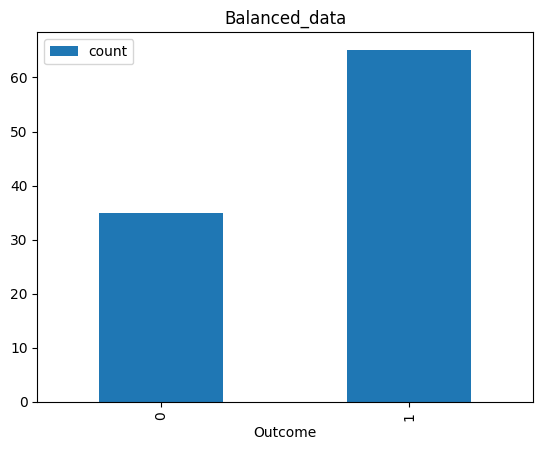

In [192]:
balance_data.plot(kind='bar')
plt.legend()
plt.title('Balanced_data')
plt.show()

## Bi-variate Analysis


### Creatind scatter charts Between the pair of variables to understand the relationships.

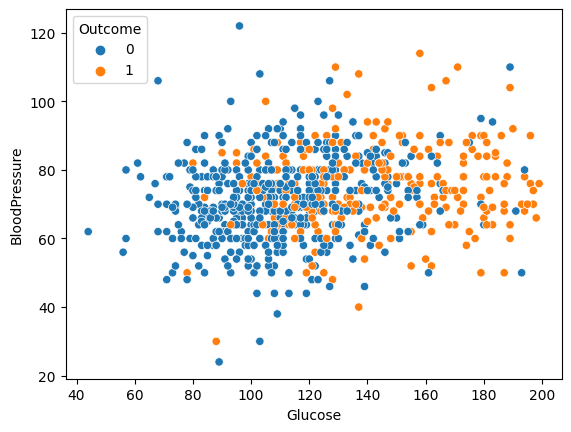

In [193]:
plt.Figure(figsize=(12,5))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=df)
plt.show()

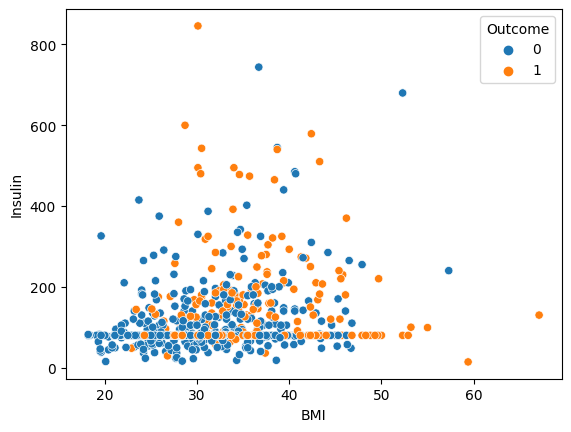

In [194]:
plt.Figure(figsize=(12,5))
sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=df)
plt.show()

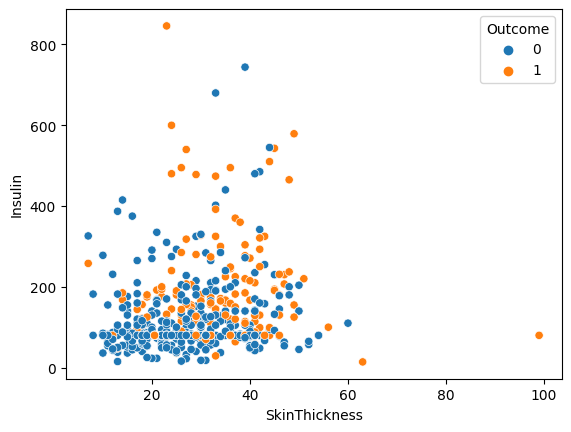

In [195]:
plt.Figure(figsize=(12,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=df)
plt.show()

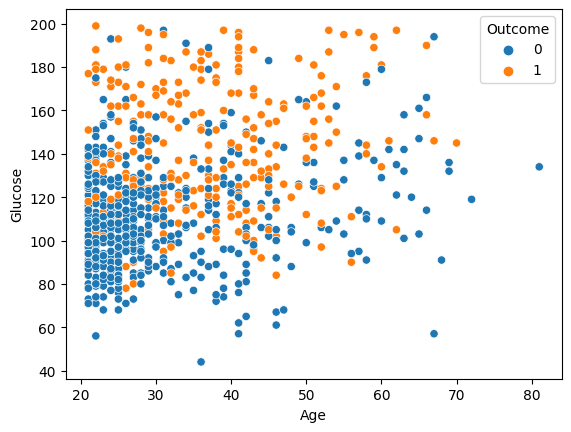

In [196]:
plt.Figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=df)
plt.show()

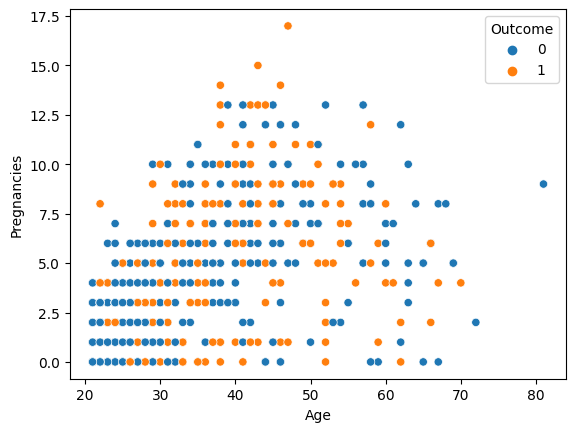

In [197]:
plt.Figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=df)
plt.show()

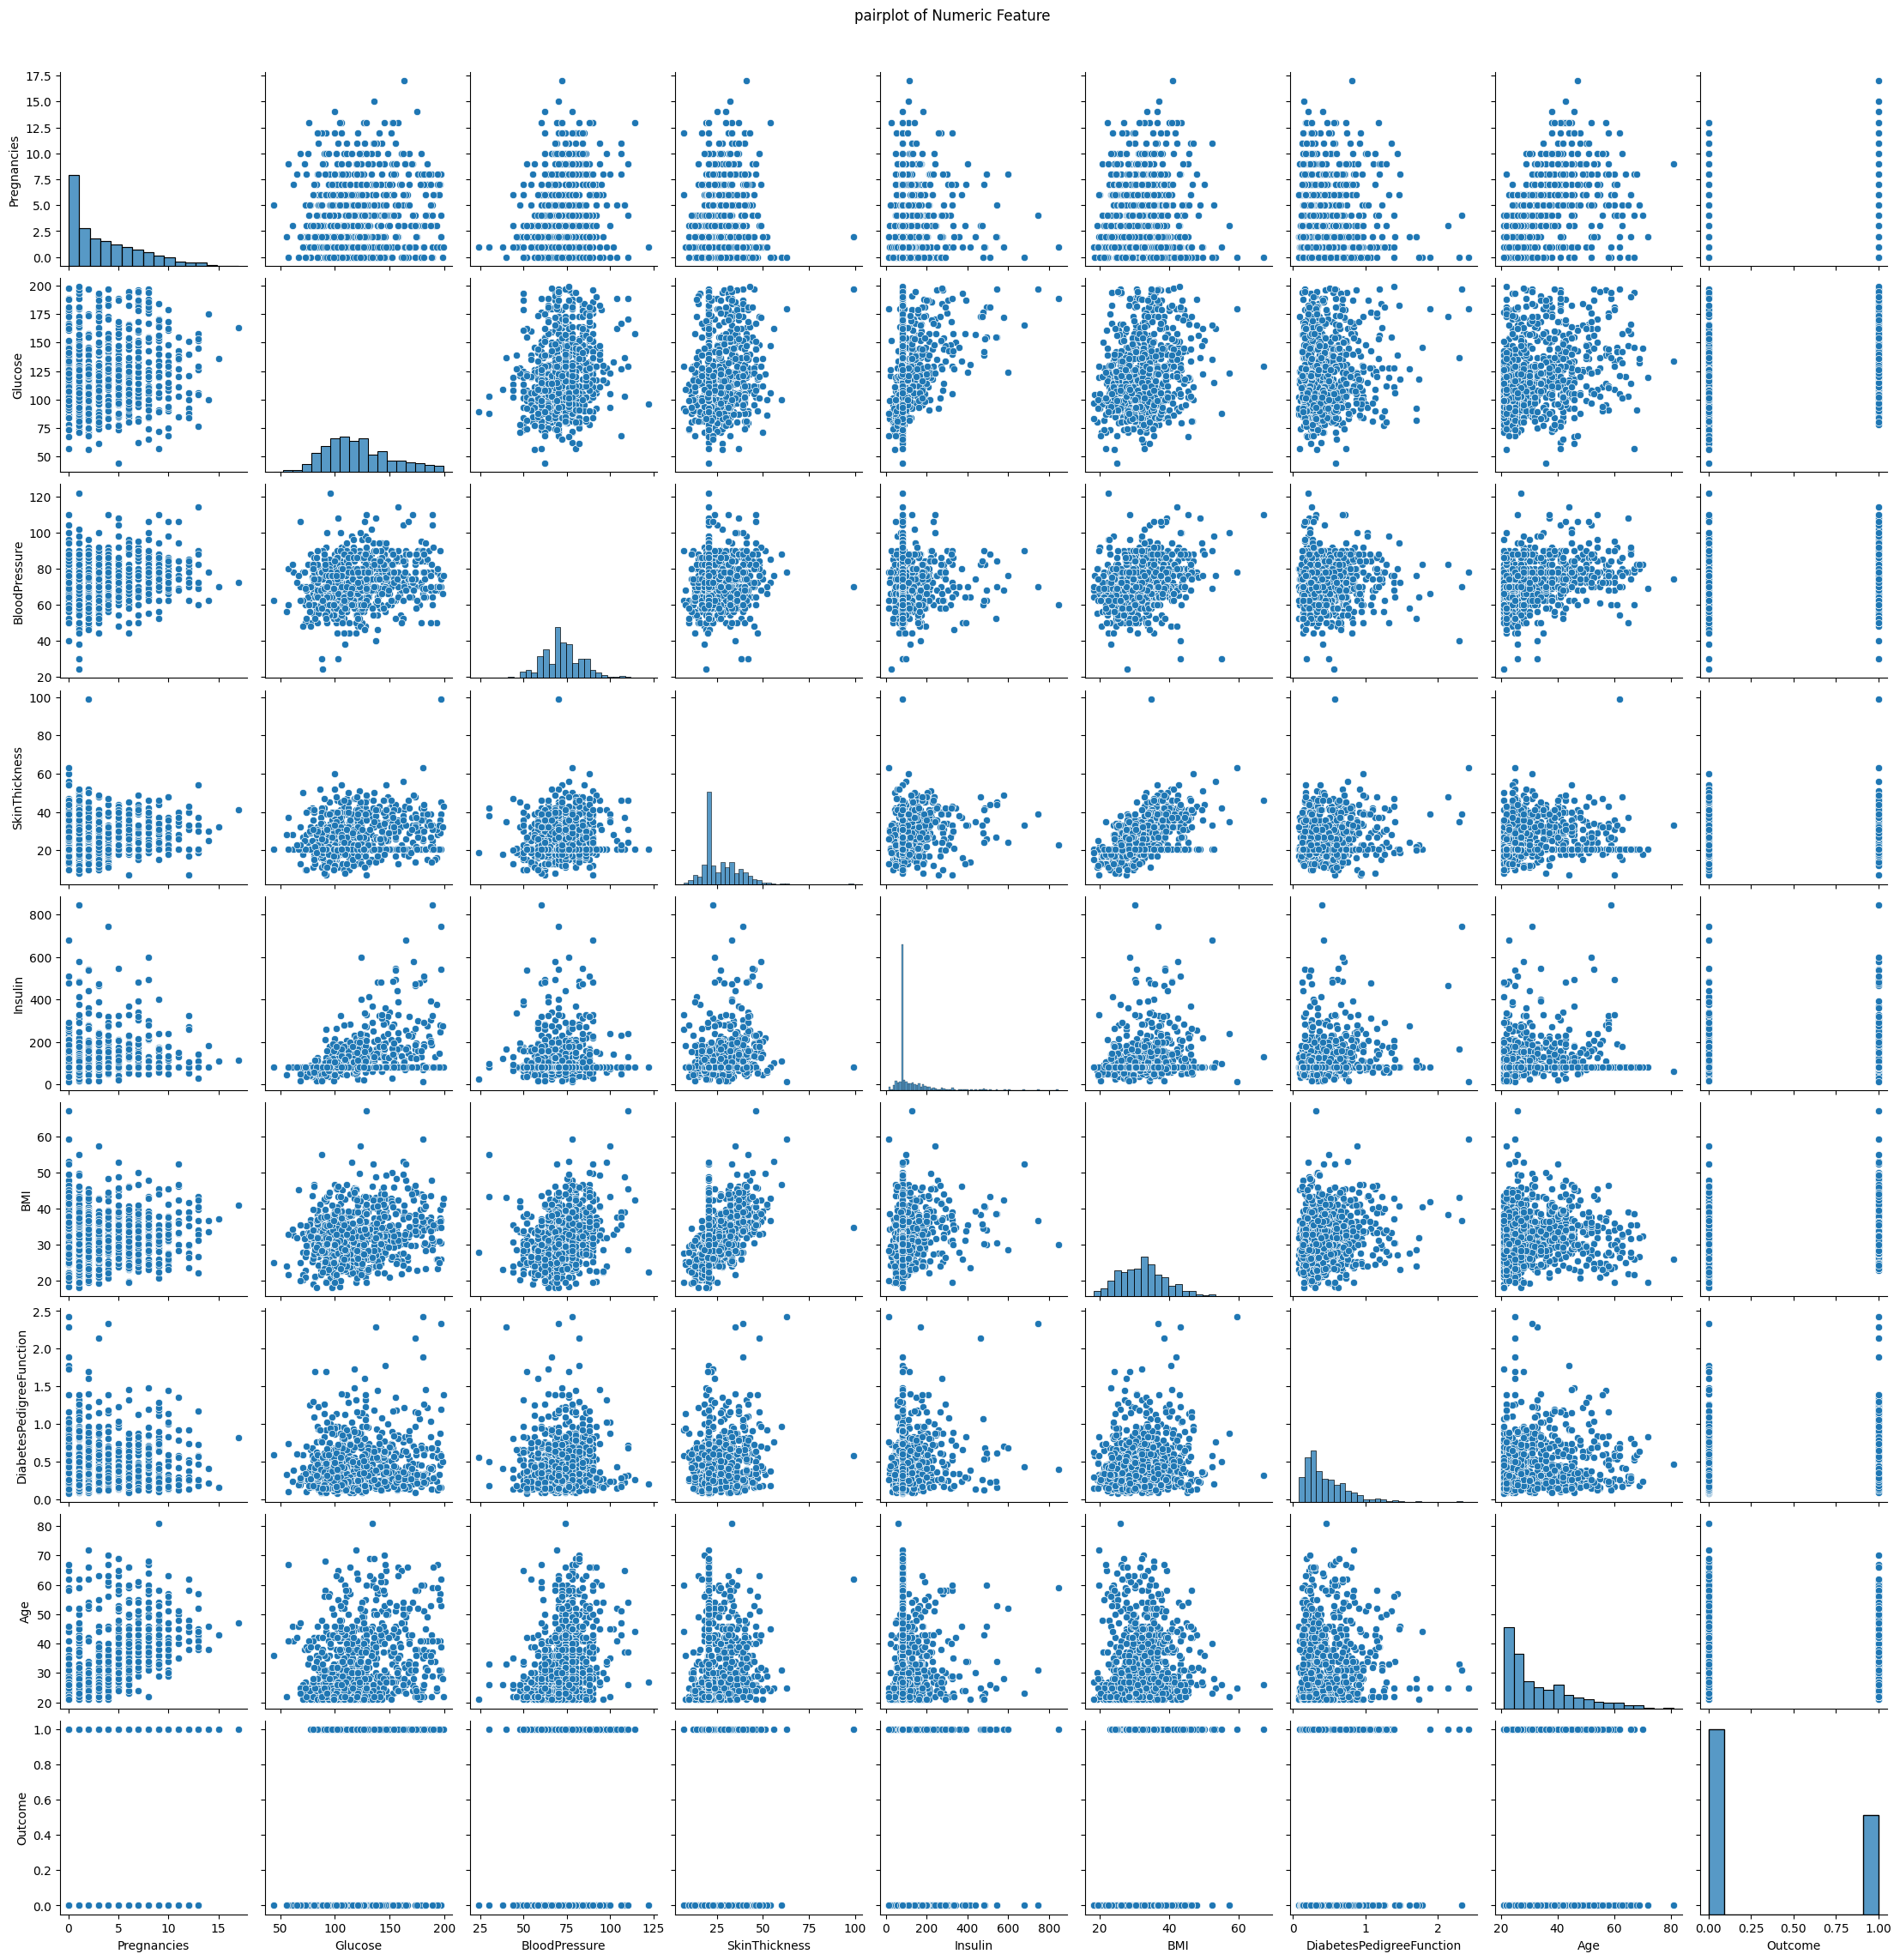

In [198]:
sns.pairplot(df)
plt.suptitle("pairplot of Numeric Feature",y=1.02)
plt.show()

## Multi variable Analysis

### Perform correlation analysis ,Visually explore it using a heat map.

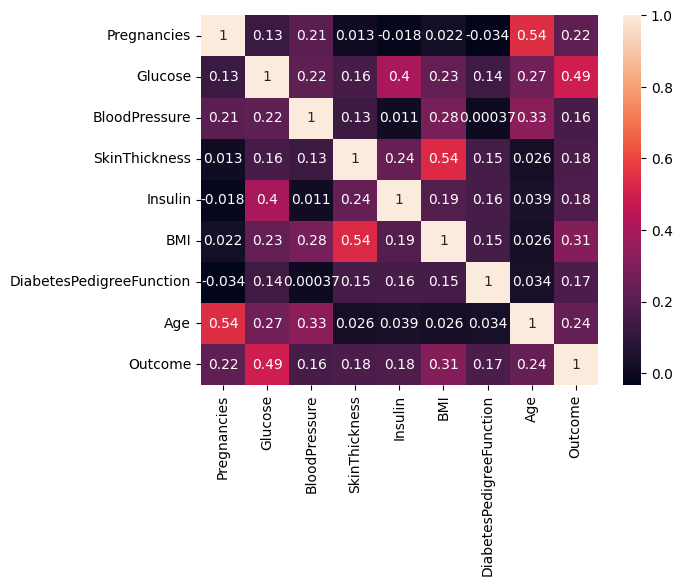

In [199]:
plt.Figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

## We can see Outcome has maximum relation with Glucose and minimum with Blood presure than the other feature

## Feature Selection

In [200]:
# data prepration for modeling
x=df.drop(['Outcome'],axis=1)
y=df.Outcome

In [201]:
#Finding the correlatin of every feature with outcome(Target Variable)
df.corrwith(df['Outcome'])

Pregnancies                 0.221898
Glucose                     0.492908
BloodPressure               0.162986
SkinThickness               0.175026
Insulin                     0.179185
BMI                         0.312254
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [202]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [203]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [204]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [205]:
type(y)

pandas.core.series.Series

In [206]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 10 best features

                      Specs        Score
4                   Insulin  1798.088682
1                   Glucose  1418.660636
7                       Age   181.303689
0               Pregnancies   111.519691
5                       BMI   108.937867
3             SkinThickness    81.917622
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


In [207]:
new_x=df.drop(['Outcome','BloodPressure'],axis=1)
new_y=df.Outcome.values

## SMOTE to address the class imbalance

### Train a Model

In [208]:
#train test split for data modeling
x_trian,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size=0.2,random_state=10)
print("Before Oversampling ,counts of label '1' :{}".format(sum(y_train==1)))
print("Before Oversampling ,counts of label '0' :{}\n".format(sum(y_train==0)))
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=63)
x_trian_res ,y_train_res = sm.fit_resample(x_trian,y_train.ravel())
print("After Oversampling ,the shape of x_train :{}".format(x_trian_res.shape))
print("After Oversampling ,the shape of y_train :{}\n".format(y_train_res.shape))


print("After Oversampling ,counts of label '1' :{}".format(sum(y_train_res==1)))
print("After Oversampling ,counts of label '0' :{}\n".format(sum(y_train_res==0)))

Before Oversampling ,counts of label '1' :209
Before Oversampling ,counts of label '0' :405

After Oversampling ,the shape of x_train :(810, 7)
After Oversampling ,the shape of y_train :(810,)

After Oversampling ,counts of label '1' :405
After Oversampling ,counts of label '0' :405



### Applying An appropriate classification alogorithm to build a model

### Model 1 Building a Logistic Regression Model

In [239]:
model =LogisticRegression(solver='liblinear',random_state=123)
model.fit(x_trian_res,y_train_res)

LogisticRegression(random_state=123, solver='liblinear')

In [240]:
predicted=model.predict(x_test)

In [241]:
print('Accuracy_score - ',accuracy_score(y_test,predicted))
print('Mean_square_Error -',mean_squared_error(y_test,predicted))

Accuracy_score -  0.7337662337662337
Mean_square_Error - 0.2662337662337662


In [242]:
print((confusion_matrix(y_test,predicted)))


[[71 24]
 [17 42]]


In [243]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        95
           1       0.64      0.71      0.67        59

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.74      0.73      0.74       154



AUC: 0.837


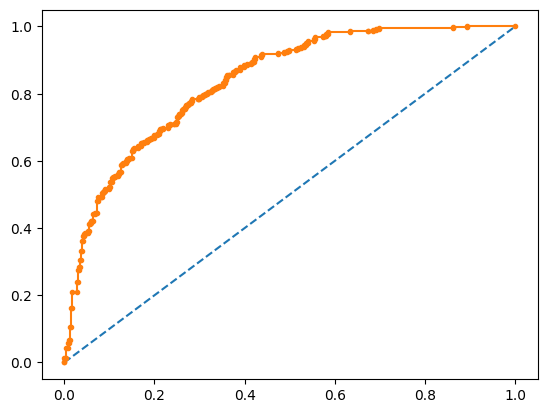

In [210]:
#Preparing ROC Curve (Receiver Operation Charactristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#predict Probabilities
probs= model.predict_log_proba(x_trian_res)
#keep probabilities for the positive outcome only
probs=probs[:,1]
#calculate AUC
auc =roc_auc_score(y_train_res,probs)
print('AUC: %.3f' % auc)
#calculate roc curve 
fpr, tpr , thresholds =roc_curve(y_train_res,probs)
#plot no skill
plt.plot([0,1],[0,1],linestyle='--')
#plot the roc curve for the model
plt.plot(fpr,tpr,marker='.')
plt.show()

### Model 2: Random ForestClassification

In [211]:
rf =RandomForestClassifier(random_state=42,max_depth=5)

In [212]:
rf.fit(x_trian_res,y_train_res)

RandomForestClassifier(max_depth=5, random_state=42)

In [213]:
rf_predicted=rf.predict(x_test)

In [214]:
print('Accuracy_score - ',accuracy_score(y_test,rf_predicted))
print('Mean_square_Error -',mean_squared_error(y_test,rf_predicted))

Accuracy_score -  0.7792207792207793
Mean_square_Error - 0.22077922077922077


### Random ForestClassifier(Hyper Parameter Tunning)

In [215]:
param_grid={'n_estimators':[100,400,200,300],'criterion':['gini','entropy'],'max_depth':[1,2,3],'min_samples_split':[2,4,3],'min_samples_leaf':[1,2,3],
'max_leaf_nodes':[1,2,3],'max_samples':[2,4,3]}
grid=GridSearchCV( estimator=rf,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)
rf_grid=RandomForestClassifier(criterion= 'gini',max_depth= 2,max_leaf_nodes=3,max_samples=4,min_samples_leaf= 1,min_samples_split=3,
n_estimators= 400,random_state=42)
rf_grid.fit(x_trian_res,y_train_res)
rf_grid_predict=rf_grid.predict(x_test)
print('Accuracy_score -',accuracy_score(y_test,rf_grid_predict))
print('Mean_squared_error -',mean_squared_error(y_test,rf_grid_predict))
print((confusion_matrix(y_test,predicted)))
print(classification_report(y_test,predicted))

Accuracy_score - 0.7337662337662337
Mean_squared_error - 0.2662337662337662
[[71 24]
 [17 42]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        95
           1       0.64      0.71      0.67        59

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.74      0.73      0.74       154



AUC: 0.935


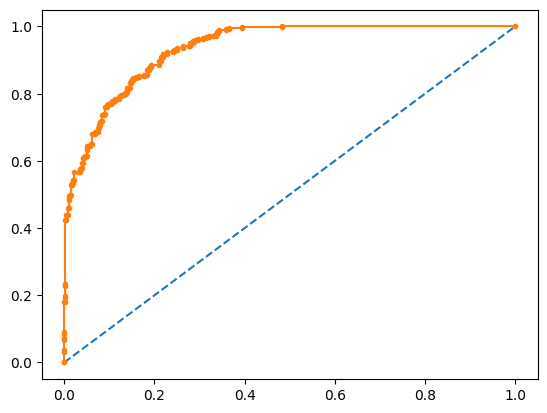

In [216]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# predict probabilities
probs = rf.predict_proba(x_trian_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Model 3: DecisionTreeClassifier

In [217]:
dc =DecisionTreeClassifier(random_state=42)
dc.fit(x_trian_res,y_train_res)


DecisionTreeClassifier(random_state=42)

In [218]:
dc_predicted=dc.predict(x_test)


In [219]:
print('Accuracy_score -',accuracy_score(y_test,dc_predicted))
print('Mean_squared_error -',mean_squared_error(y_test,dc_predicted))

Accuracy_score - 0.6103896103896104
Mean_squared_error - 0.38961038961038963


### DecisionTreeClassifier(Hyper Parameter Tunning)

In [220]:
dc_param_grid={'splitter':["best", "random"],'criterion':['gini','entropy'],'max_depth':[1,2,3],
'min_samples_split':[1,2,3],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3]}
import warnings
warnings.filterwarnings('ignore')
dc_grid=GridSearchCV(estimator=dc,param_grid=dc_param_grid,n_jobs=-1,cv=5,verbose=2)
dc_grid.fit(x_trian_res,y_train_res)
dc_grid.best_params_
dc_final=DecisionTreeClassifier(criterion= 'gini', max_depth=2,max_leaf_nodes=4,min_samples_leaf= 1, min_samples_split= 2,splitter='best',random_state=42)
dc_final.fit(x_trian_res,y_train_res)
dc_final_predicted=dc_final.predict(x_test)
print('Accuracy_score -',accuracy_score(y_test,dc_final_predicted)) 
print('Mean_squared_error -',mean_squared_error(y_test,dc_final_predicted))
print((confusion_matrix(y_test,dc_final_predicted)))
print((classification_report(y_test,dc_final_predicted)))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


Accuracy_score - 0.6883116883116883
Mean_squared_error - 0.3116883116883117
[[73 22]
 [26 33]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.60      0.56      0.58        59

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.68      0.69      0.69       154



### Model 4: KNN

In [221]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_trian_res,y_train_res)


KNeighborsClassifier(n_neighbors=4)

In [222]:
knn_pred=knn.predict(x_test)


In [223]:
print('Accuracy_score -',accuracy_score(y_test,knn_pred))
print('Mean_squared_error -',mean_squared_error(y_test,knn_pred))


Accuracy_score - 0.6298701298701299
Mean_squared_error - 0.37012987012987014


In [224]:
print((confusion_matrix(y_test,knn_pred)))


[[68 27]
 [30 29]]


In [225]:
print((classification_report(y_test,knn_pred)))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70        95
           1       0.52      0.49      0.50        59

    accuracy                           0.63       154
   macro avg       0.61      0.60      0.60       154
weighted avg       0.63      0.63      0.63       154



AUC: 0.951


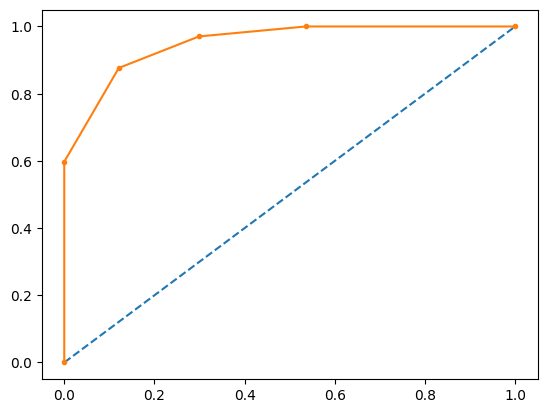

In [226]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# predict probabilities
probs = knn.predict_proba(x_trian_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Model 5: SVM

In [227]:
from sklearn.svm import SVC
svm =SVC()
svm.fit(x_trian_res,y_train_res)


SVC()

In [228]:
svm_pred=knn.predict(x_test)


In [229]:
print('Accuracy_score -',accuracy_score(y_test,svm_pred))
print('Mean_squared_error -',mean_squared_error(y_test,svm_pred))


Accuracy_score - 0.6298701298701299
Mean_squared_error - 0.37012987012987014


In [230]:
print((confusion_matrix(y_test,svm_pred)))


[[68 27]
 [30 29]]


In [231]:
print((classification_report(y_test,svm_pred)))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70        95
           1       0.52      0.49      0.50        59

    accuracy                           0.63       154
   macro avg       0.61      0.60      0.60       154
weighted avg       0.63      0.63      0.63       154



### Model 5: Naive Bayes

In [232]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_trian_res, y_train_res)


GaussianNB()

In [233]:
nb_pred=nb.predict(x_test)


In [234]:
print('Accuracy_score -',accuracy_score(y_test,nb_pred))
print('Mean_squared_error -',mean_squared_error(y_test,nb_pred))


Accuracy_score - 0.7142857142857143
Mean_squared_error - 0.2857142857142857


In [235]:
print((confusion_matrix(y_test,nb_pred)))


[[75 20]
 [24 35]]


In [236]:
print((classification_report(y_test,nb_pred)))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        95
           1       0.64      0.59      0.61        59

    accuracy                           0.71       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



### Model Accuracy Comparison

In [237]:

Algorithms=['KNN','RandomForest','Decisiontree','logreg','SVM','Naivebayes']
Accuracy_Score=[accuracy_score(y_test,knn_pred),accuracy_score(y_test,rf_grid_predict),accuracy_score(y_test,dc_final_predicted),accuracy_score(y_test,predicted),accuracy_score(y_test,svm_pred),accuracy_score(y_test,nb_pred)]
# Create a DataFrame
accuracy_df = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy': Accuracy_Score})
 
# Display the accuracy table
print(accuracy_df)



      Algorithm  Accuracy
0           KNN  0.629870
1  RandomForest  0.733766
2  Decisiontree  0.688312
3        logreg  0.733766
4           SVM  0.629870
5    Naivebayes  0.714286


### Comparison of Various Models with the results from KNN Algorithm

In [238]:
#creating the objects
logreg_cv = LogisticRegression(solver='liblinear',random_state=123)
dt_cv=DecisionTreeClassifier(random_state=123)
knn_cv=KNeighborsClassifier()
rf_cv=RandomForestClassifier(random_state=123)
svm_cv=SVC()
nb_cv=GaussianNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Random Forest',4:'SVM',5:'Naivebayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,rf_cv,svm_cv,nb_cv]
 
 
for i,model in enumerate(cv_models):
  print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, x_trian, y_train, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.7752247488101534
Decision Tree Test Accuracy: 0.7150713907985192
KNN Test Accuracy: 0.724616604970915


Random Forest Test Accuracy: 0.7685880486515072
SVM Test Accuracy: 0.765520888418826
Naivebayes Test Accuracy: 0.7572712850343734
